In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

%matplotlib inline

#Perceptron Notes

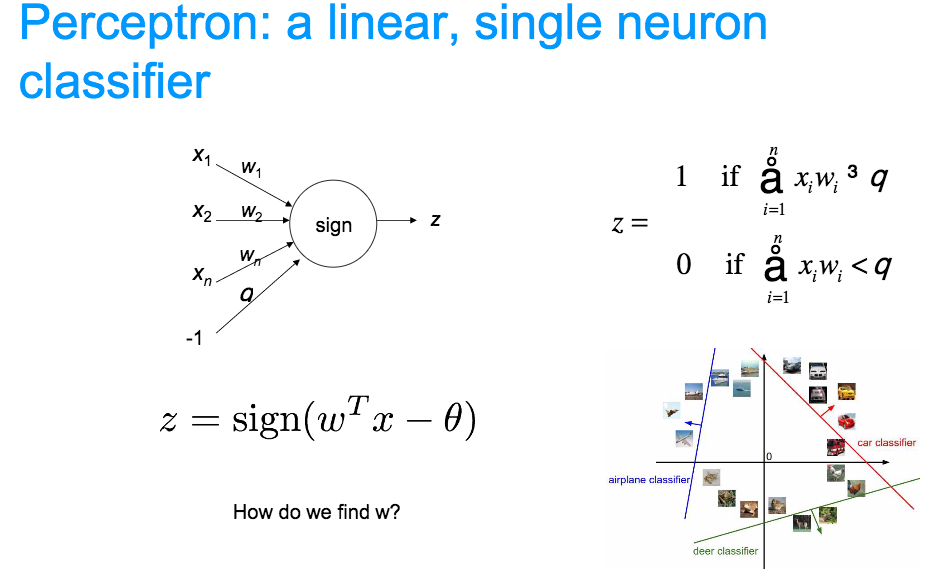

In [2]:
from IPython.display import Image
Image(filename= 'perceptron1.png')

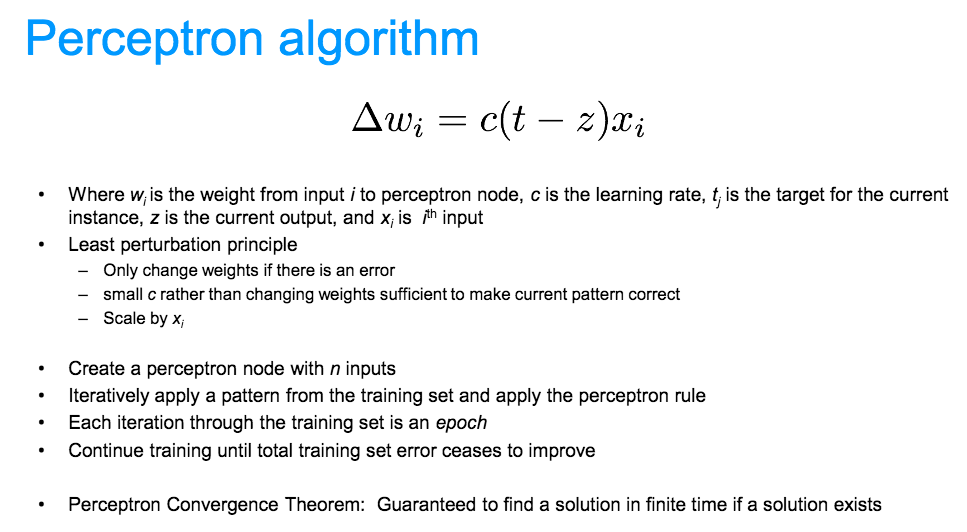

In [3]:
Image(filename='perceptron2.png')

#Iris Dataset

In [4]:
irisData = pd.read_csv( 'Fisher.csv' )
m = irisData.as_matrix()
irisLabels = m[:,0]
irisLabels[ irisLabels==2 ] = 1  # squash class 2 into class 1
irisLabels = np.atleast_2d( irisLabels ).T
irisFeatures = m[:,1:5]
print 'Iris Labels:', irisLabels.shape
print 'Iris Features', irisFeatures.shape

Iris Labels: (150, 1)
Iris Features (150, 4)


In [5]:
#Start
irisData[:10]

,Type,PW,PL,SW,SL
0,0,2,14,33,50
1,1,24,56,31,67
2,1,23,51,31,69
3,0,2,10,36,46
4,1,20,52,30,65
5,1,19,51,27,58
6,1,13,45,28,57
7,1,16,47,33,63
8,1,17,45,25,49
9,1,14,47,32,70


#CI-FAR 10 Dataset

In [21]:
def unpickle( file ):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict
 
data = unpickle( 'cifar-10-batches-py/data_batch_1' )
 
cifarFeatures = data['data']
cifarLabels = data['labels']
cifarLabels = np.atleast_2d( cifarLabels ).T
 
# squash classes 0-4 into class 0, and squash classes 5-9 into class 1
cifarLabels[ cifarLabels < 5 ] = 0
cifarLabels[ cifarLabels >= 5 ] = 1

In [22]:
print cifarFeatures.shape

(10000, 3072)


In [23]:
cifarFeatures[:5]

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       [ 28,  37,  38, ...,  28,  37,  46],
       [170, 168, 177, ...,  82,  78,  80]], dtype=uint8)

In [24]:
cifarLabels[:5]

array([[1],
       [1],
       [1],
       [0],
       [0]])

#Perceptron Implementation

In [45]:
class perceptron(object):

    minRand = -5
    maxRand = 5
    
    def __init__(self, features,labels,learningRate=.1):
        
        self.allFeatures = features
        self.allLabels = labels
        self.learningRate = learningRate
        self.weights = np.random.rand(1,len(self.allFeatures.T) + 1) # the extra weight is for the bias 
        self.numberOfFeatures = len(self.allFeatures.T)
        self.numberOfWeights = len(self.allFeatures.T) + 1
        
        middlePoint = len(self.allFeatures)/2
        self.trainingFeatures = self.allFeatures[:middlePoint]
        self.trainingLabels = self.allLabels[:middlePoint]
        self.testingFeatures = self.allFeatures[middlePoint:]
        self.testingLabels = self.allLabels[middlePoint:]
        
        self.accuracies = []
        self.testAccuracies = []
        self.norms = []
        
    def measureAccuracy(self, features, labels):
        
        correctPredictions = 0
        
        for rowIndex in range(0,len(features),1):
            prediction = self.predict(np.append(features[rowIndex],1))
            correctValue = labels[rowIndex]
            if prediction == correctValue:
                correctPredictions += 1
                
        return float(correctPredictions) / float(len(features))
    

    def predict(self, X):
        sumXW = np.dot(np.atleast_2d(X)[0],self.weights[0])        
        prediction = 0
        theta = self.weights[0][len(self.weights[0])-1] # the last weight paired with the bias input
        
        if sumXW > theta:
            prediction = 1
        else: 
            prediction = 0
            
        return prediction
    
    def trainEpoch(self ):
        
        self.norms.append(math.log(self.calculateLSquaredNorm(), 2))
        self.accuracies.append(self.measureAccuracy(self.testingFeatures,self.testingLabels))
        
        for rowIndex in range(0,len(self.trainingFeatures),1):
            X = np.append(self.trainingFeatures[rowIndex],1) # append 1 for Bias
            prediction = self.predict(X)
            actualValue = int(self.trainingLabels[rowIndex][0])
                        
            # update weights
            if prediction != actualValue: 
                changeOfWeights = self.learningRate * (actualValue - prediction) * X
                self.weights[0:] = self.weights[0:] + changeOfWeights[0:]

        
    def train(self,numberOfEpochs):
        
        self.accuracies = []
        self.norms = []
        
        for epochIndex in range(0,numberOfEpochs,1):
            self.trainEpoch()            
        
    def calculateLSquaredNorm(self):
        sumOfWeights = 0
        for w in self.weights[0]:
            sumOfWeights += w * w
        return math.sqrt(sumOfWeights)
        

In [46]:
irisX = perceptron(irisFeatures,irisLabels,learningRate=1)
irisX.train(100)

#Iris Testing Accuracies

In [48]:
iris1 = perceptron(irisFeatures,irisLabels,learningRate=1)
irisPoint1 = perceptron(irisFeatures,irisLabels,learningRate=.1)
irisPointZeroOne = perceptron(irisFeatures,irisLabels,learningRate=.01)

In [49]:
iris1.train(100)
irisPoint1.train(100)
irisPointZeroOne.train(100)

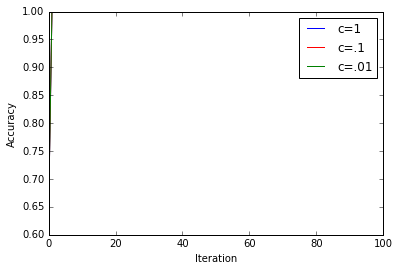

In [61]:
plt.plot(iris1.accuracies,color='b',label='c=1')
plt.plot(irisPoint1.accuracies,color='r',label='c=.1')
plt.plot(irisPointZeroOne.accuracies,color='g',label='c=.01')

t = np.arange(0, 100, 1)

plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.figure(figsize=(15, 12))
plt.show()

# Iris Norms

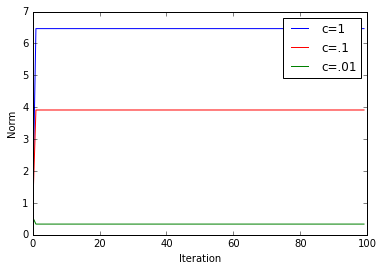

In [60]:
plt.plot(iris1.norms,color='b',label='c=1')
plt.plot(irisPoint1.norms,color='r',label='c=.1')
plt.plot(irisPointZeroOne.norms,color='g',label='c=.01')

plt.xlabel('Iteration')
plt.ylabel('Norm')
plt.legend()
plt.figure(figsize=(15, 12))
plt.show()

# CIFAR Testing Accuracies

In [52]:
cifar001 = perceptron(cifarFeatures,cifarLabels,learningRate=.001)
cifar00001 = perceptron(cifarFeatures,cifarLabels,learningRate=.00001)
cifar001.train(100)
cifar00001.train(100)

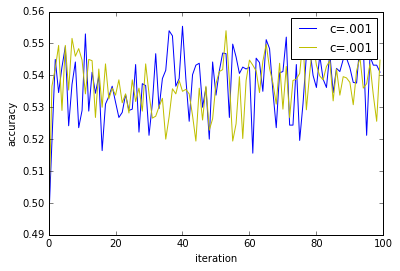

In [56]:
plt.plot(cifar001.accuracies,color='b',label='c=.001')
plt.plot(cifar00001.accuracies,color='y',label='c=.001')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.legend()
plt.figure(figsize=(15, 12))
plt.show()

#CIFAR Norms

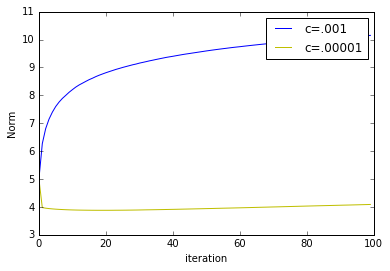

In [58]:
plt.plot(cifar001.norms,color='b',label='c=.001')
plt.plot(cifar00001.norms,color='y',label='c=.00001')
plt.xlabel('iteration')
plt.ylabel('Norm')
plt.legend()
plt.figure(figsize=(15, 12))
plt.show()